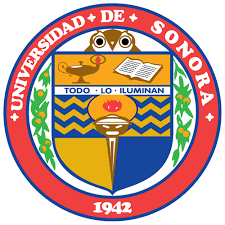



# **Actividad 7**

*Álgebra Lineal con Python*

Iveth Rocio Navarro Lopez



---

In [12]:
import numpy as np
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow
import matplotlib.pyplot as plt



---

**Actividad 7.1**



In [ ]:
#Matriz A

A = np.array( [[1,3],[-1,7]] )

print( A, " = A" ) 
print( " " )


#Matriz B

B = np.array( [[5,2],[1,2]] )

print( B, " = B" ) 
print( " " )


#Matriz I

# I = np.array( [[1,0],[0,1]] )
I = np.eye(2, dtype=int)

print( I, " = I" ) 
print( " " )

#Para definir la matriz identidad, se puede utilizar la función np.eye(2, dtype=int). Ver manual de*[*np.eye()`*]

#Luego, para calcular 2*I+3*A+A@B:

R = 2*I+3*A+A@B #Donde R es la matriz resultante

print( R, " =R" )

[[ 1  3]
 [-1  7]]  = A
 
[[5 2]
 [1 2]]  = B
 
[[1 0]
 [0 1]]  = I
 
[[13 17]
 [-1 35]]  =R




---
**Actividad 7.2**



In [ ]:
# Definiendo el polinomio característico

def P2( M ):
  P2 = la.det( M )*np.eye(2, dtype=int) - np.trace( M )*M + mpow( M, 2 )

  print( P2, " = P2(A) " )

#Solicitando valores a la matriz

print ( "Por favor introduzca los valores de la matriz en orden de filas." )

a = float( input( "¿Cuál es el valor de a?: " ) )
b = float( input( "¿Cuál es el valor de b?: " ) )
c = float( input( "¿Cuál es el valor de c?: " ) )
d = float( input( "¿Cuál es el valor de d?: " ) )
print ( " " )

A = np.array( [[a,b],[c,d]] )

print( A, " = A" )


#------------------------------------------------------------------------

detA = la.det( A )

if detA == 0 :
  print( "det( A )= ", detA )
  print ( "No se puede calcular el polinómio característico ya que el determinante de la matriz es 0" )

else:
  print( "det( A )= ", detA )
  print( " " )
  P2A = P2( A )

Por favor introduzca los valores de la matriz en orden de filas.
¿Cuál es el valor de a?: 4
¿Cuál es el valor de b?: 2
¿Cuál es el valor de c?: 7
¿Cuál es el valor de d?: 9
 
[[4. 2.]
 [7. 9.]]  = A
det( A )=  22.0
 
[[0. 0.]
 [0. 0.]]  = P2(A) 




---
**Actividad 7.3**



In [ ]:
#Reducción de Gauss: Cambio de renglones

def INTER( M, i, j ):
    print( "Intercambiar renglones i y j en la matriz M" )

    n = M.shape[0]
    E = np.eye(n)
    E[ i, i ] = 0
    E[ j, j ] = 0
    E[ i, j ] = 1
    E[ j, i ] = 1
    return E @ M

#Eliminación de Gauss: Multiplicación de renglones

def MULTI( M, k, i ):
    print( "Multiplicar el renglón i por k en la matriz M" )

    n = M.shape[0]
    E = np.eye(n)
    E[ i, i ] = k
    return E @ M

#Eliminación de Gauss: Suma de renglones

def SUMAR( M, k, i, j ):
    print( "Sumar k veces el renglón j al renglón i en la matriz M" )

    n = M.shape[0]
    E = np.eye(n)
    if i == j:
        E[ i, i ] = k + 1
    else:
        E[ i, j ] = k
    return E @ M

#De sistema de ecuaciones a matriz

  #   x - 3y +  z = 1 (0)   eq. 1
  #  3x - 4y +  z = 5 (1)   eq. 2
  #       2y -  z = 0 (2)   eq. 3

M = np.array( [ [ 1., -3., 1. ], [ 3., -4., 1. ], [ 0., 2., -1. ] ] )
print( M, " = M" )
print( " " )
print( "det(M) = ", la.det(M) )



MI = np.hstack( [ M, np.eye( 3 ) ] )
print( " " )
print( MI, " = MI" ) #Matriz M aumentado con I


#Gauss-Jordan

#Paso 1

  # L1:   1  - 3    1  (0) # 3*L1 + L2 ==> L2
  # L2:   2  - 4    1  (1) # 

MI1 = SUMAR( MI, -3, 1, 0 )

print( MI1 )

#Paso 2

 # L2:   0    5  - 2  (1) # (-2/5)*L2 + L3 ==> L3
 # L3:   0    2  - 1  (2) #

MI2 = SUMAR( MI1, -2/5, 2, 1 )

print( MI2 )
print( " " )

MI2int = MULTI ( MI2, -5, 2 )

print( MI2int )
print( " " )

MI2int2 = MULTI ( MI2int, -5, 0 )

print( MI2int2 )
print( " " )

 # L1: - 5   15  - 5  (0) # -3*L2 + L1 ==> L1
 # L2:   0    5  - 2  (1) #

MI3 = SUMAR( MI2int2, -3, 0, 1 )

print( MI3 )
print( " " )


#Paso 3

 # L3:   0    0    1  (2) # 2*L3 ==> L3

MI3int = MULTI ( MI3, 2, 2 )

print( MI3int )
print( " " )


 # L2:   0    5  - 2  (1) # L3 + L2 ==> L2
 # L3:   0    0    2  (2) #

MI4 = SUMAR( MI3int, 1, 1, 2 )

print( MI4 )
print( " " )


 # L3:   0    0    2  (2) # 1/2*L3 ==> L3

MI4int = MULTI ( MI4, 1/2, 2 )

print( MI4int )
print( " " )


 # L1: - 5    0    1  (0) # -1*L3 + L1 ==> L1
 # L2:   0    5    0  (1) #
 # L3:   0    0    1  (2) #

MI5 = SUMAR( MI4int, -1, 0, 2 )

print( MI5 )
print( " " )


 # L1: - 5    0    0  (0) # (-1/5)*L1 ==> L1
 # L2:   0    5    0  (1) # ( 1/5)*L2 ==> L2
 # L3:   0    0    1  (2) #

MI6 = MULTI ( MI5, -1/5, 0 )

print( MI6 )
print( " " )

MI7 = MULTI ( MI6, 1/5, 1 )

print( MI7 )
print( " " )

# Matriz inversa

print( "La matriz Inversa de M es: " )
print( " " )

MInv = MI7[ :, 3:]
print( MInv, " = M^(-1)" )
print( " " )


print( "Comprobamos que el producto de M con la Inversa obtenida sea la identidad" )
print( " " )

Comp = M @ MInv
print( Comp )
print( " " )


print( "Comprobamos el resultado anterior, para la Inversa con valores enteros" )
print( " " )

Inv = np.array( [ [-2, 1, -1 ], [ -3, 1, -2 ], [ -6, 2, -5 ] ] )

print( Inv, " = M^(-1)" )
print( " " )

pro = M @ Inv
print( pro, " = I" )
print( " " )

print( "Comprobamos el resultado con la función 'la.inv(M)' que nos da la inversa" )
print( " " )

print( la.inv( M ), " = M^(-1)" )

# Vector de resultados

vec = np.array( [ 1, 5, 0 ] ).reshape( 3, 1 )
print( vec )

#Solución

res = MInv @ vec
print( res, " = b" )


[[ 1. -3.  1.]
 [ 3. -4.  1.]
 [ 0.  2. -1.]]  = M
 
det(M) =  -1.0000000000000004
 
[[ 1. -3.  1.  1.  0.  0.]
 [ 3. -4.  1.  0.  1.  0.]
 [ 0.  2. -1.  0.  0.  1.]]  = MI
Sumar k veces el renglón j al renglón i en la matriz M
[[ 1. -3.  1.  1.  0.  0.]
 [ 0.  5. -2. -3.  1.  0.]
 [ 0.  2. -1.  0.  0.  1.]]
Sumar k veces el renglón j al renglón i en la matriz M
[[ 1.  -3.   1.   1.   0.   0. ]
 [ 0.   5.  -2.  -3.   1.   0. ]
 [ 0.   0.  -0.2  1.2 -0.4  1. ]]
 
Multiplicar el renglón i por k en la matriz M
[[ 1. -3.  1.  1.  0.  0.]
 [ 0.  5. -2. -3.  1.  0.]
 [ 0.  0.  1. -6.  2. -5.]]
 
Multiplicar el renglón i por k en la matriz M
[[-5. 15. -5. -5.  0.  0.]
 [ 0.  5. -2. -3.  1.  0.]
 [ 0.  0.  1. -6.  2. -5.]]
 
Sumar k veces el renglón j al renglón i en la matriz M
[[-5.  0.  1.  4. -3.  0.]
 [ 0.  5. -2. -3.  1.  0.]
 [ 0.  0.  1. -6.  2. -5.]]
 
Multiplicar el renglón i por k en la matriz M
[[ -5.   0.   1.   4.  -3.   0.]
 [  0.   5.  -2.  -3.   1.   0.]
 [  0.   0.   2. -12. 



---

**Actividad 7.4**

In [ ]:
#Definiendo las matrices

print("Matrices")
B1 = np.array( [ [ 2., 0., 0. ], [ 0., 3., 4. ], [ 0., 4., 9. ] ] )
print( B1 )
print( " " )

B2 = np.array( [ [ 0, 1, 0 ], [ 0, 0, 1 ], [ 1, 0, 0 ] ] )
print( B2 )
print( " " )

B3 = np.array( [ [ 2, 0, 0, 0 ], [ 1, 2, 0, 0 ], [ 0, 1, 3, 0 ], [ 0, 0, 1, 3 ] ] )
print( B3 )
print( " " )


#Matriz B1

print("Matriz B1")
eigval, eigvec = la.eig( B1)

print( "Eigenvalores: " )
print( eigval )
print( " " )
print( "Eigenvectores: " )
print( eigvec )
print( " " )

#Los eigenvectores son LI

vec1 = eigvec[ :, 0 ]
vec2 = eigvec[ :, 1 ]
print( "Vec1 = ", vec1 )
print( "Vec2 = ", vec2 )
print( " " )


print( "Producto matricial : ", vec1@vec2 ) #Calculando el producto matricial 
print( "Producto escalar : " , np.dot( vec1, vec2.T ) ) #Calculando el producto punto de 2 vectore LI


#---------------------------------------------------------------------------
#Matriz B2
print("Matriz B2")
eigval, eigvec = la.eig( B2 )

print( "Eigenvalores: " )
print( eigval )
print( " " )
print( "Eigenvectores: " )
print( eigvec )
print( " " )

#Los eigenvectores son LI 

vec1 = eigvec[ :, 0 ]
vec2 = eigvec[ :, 1 ]
print( "Vec1 = ", vec1 )
print( "Vec2 = ", vec2 )
print( " " )


print( "Producto matricial : ", vec1@vec2 ) #Calculando el producto matricial
print( "Producto escalar : " , np.dot( vec1, vec2.T ) ) #Calculando el producto punto de 2 vectore LI

#----------------------------------------------------------------------

#Matriz B3
print("Matriz B3")
eigval, eigvec = la.eig( B3 )

print( "Eigenvalores: " )
print( eigval )
print( " " )
print( "Eigenvectores: " )
print( eigvec )
print( " " )

#Los eigenvectores son LI 

vec1 = eigvec[ :, 0 ]
vec2 = eigvec[ :, 1 ]
vec3 = eigvec[ :, 2 ]
print( "Vec1 = ", vec1 )
print( "Vec2 = ", vec2 )
print( "Vec3 = ", vec3 )
print( " " )


print( "Producto matricial : ", vec1@vec2 ) #Calculando el producto matricial
print( "Producto escalar : " , np.dot( vec1, vec2.T ) ) #Calculando el producto punto de 2 vectore LI


Matrices
[[2. 0. 0.]
 [0. 3. 4.]
 [0. 4. 9.]]
 
[[0 1 0]
 [0 0 1]
 [1 0 0]]
 
[[2 0 0 0]
 [1 2 0 0]
 [0 1 3 0]
 [0 0 1 3]]
 
Matriz B1
Eigenvalores: 
[11.+0.j  1.+0.j  2.+0.j]
 
Eigenvectores: 
[[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442719 -0.4472136   0.        ]]
 
Vec1 =  [0.         0.4472136  0.89442719]
Vec2 =  [ 0.          0.89442719 -0.4472136 ]
 
Producto matricial :  -1.2594923403361582e-17
Producto escalar :  -1.2594923403361582e-17
Matriz B2
Eigenvalores: 
[-0.5+0.8660254j -0.5-0.8660254j  1. +0.j       ]
 
Eigenvectores: 
[[ 0.57735027+0.j   0.57735027-0.j  -0.57735027+0.j ]
 [-0.28867513+0.5j -0.28867513-0.5j -0.57735027+0.j ]
 [-0.28867513-0.5j -0.28867513+0.5j -0.57735027+0.j ]]
 
Vec1 =  [ 0.57735027+0.j  -0.28867513+0.5j -0.28867513-0.5j]
Vec2 =  [ 0.57735027-0.j  -0.28867513-0.5j -0.28867513+0.5j]
 
Producto matricial :  (1+0j)
Producto escalar :  (1+0j)
Matriz B3
Eigenvalores: 
[3.+0.j 3.+0.j 2.+0.j 2.+0.j]
 
Eigenvecto



---
**Actividad 7.5**


Matriz de coordenadas
[[ 0.       0.     ]
 [ 0.5      0.47942]
 [ 1.       0.84147]
 [ 1.5      0.99749]
 [ 2.       0.9093 ]
 [ 2.5      0.59847]
 [ 3.       0.14112]
 [ 3.5     -0.35078]]
 


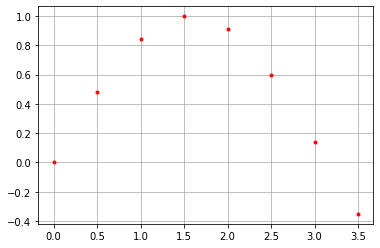

Matriz de Verdermonde de coordenadas x
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 5.00000000e-01 2.50000000e-01 1.25000000e-01
  6.25000000e-02 3.12500000e-02 1.56250000e-02 7.81250000e-03]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.50000000e+00 2.25000000e+00 3.37500000e+00
  5.06250000e+00 7.59375000e+00 1.13906250e+01 1.70859375e+01]
 [1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [1.00000000e+00 2.50000000e+00 6.25000000e+00 1.56250000e+01
  3.90625000e+01 9.76562500e+01 2.44140625e+02 6.10351562e+02]
 [1.00000000e+00 3.00000000e+00 9.00000000e+00 2.70000000e+01
  8.10000000e+01 2.43000000e+02 7.29000000e+02 2.18700000e+03]
 [1.00000000e+00 3.50000000e+00 1.22500000e+01 4.28750000e+01
  1.50062500e+02 5.25218

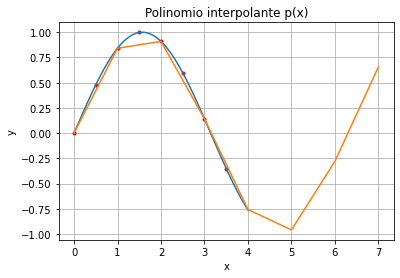

In [ ]:

# Matriz de coordenadas

coord = np.array( [ [ 0.0, 0.0 ], [ 0.5, 0.47942 ], [ 1.0, 0.84147 ], [ 1.5, 0.99749 ], [ 2.0, 0.90930 ], [ 2.5, 0.59847 ], [ 3.0, 0.14112 ], [ 3.5, -0.35078 ] ] )

print ("Matriz de coordenadas")
print( coord )
print( " " )

y = coord[ :,0 ]
x = coord[ :, 1]

plt.plot(y,x, "r.") 
plt.grid()
plt.show()

#Matriz de Verdermonde de coordenadas x

N = 8
x = coord[ :, 0 ] 
X = np.column_stack( [ x**k for k in range( 0, N ) ] )

print("Matriz de Verdermonde de coordenadas x")
print( X )

print( " " )

X = np.vander(x,increasing=True)
print(X[:8,:8])

#Vector de coordenadas y
y = coord[ :, 1]
y = np.array( y ).reshape( 8, 1 ) 
print("Vector de coordenadas y")
print( y )


#Solución para la ecuación Xa=Y

solve = la.solve( X, y )
print("Solución para la ecuación Xa=Y")
print ( solve )

#Graficando el polinomio interpolado

xinter = np.linspace(0,4,200)
yinter = sum( [ solve[ k ]*xinter**k for k in range( 0, N ) ] )
fsin = np.sin( 2*x )

plt.plot( x, y, 'r.', xinter, yinter, fsin )
plt.grid()

plt.title( "Polinomio interpolante p(x)" )
plt.xlabel( "x" )
plt.ylabel( "y" )
plt.show()




---

**Actividad 7.6**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

#Creación de DATA FRAME dela base de datos y uno adicional para trabajar

url= "https://raw.githubusercontent.com/novandromeda-a/Computational-physics/master/Actividad%201/Base%20de%20datos%20climatol%C3%B3gica.txt"

e=["Fecha","Precip","Evap","Tmax","Tmin"] #Encabezados de las columnas en la 
                                          #base de datos

df_weather = pd.read_csv(url, names=e, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')                                          
#Declaración de DATA FRAME

#print(df_weather.head(10)) 
#print(df_weather.tail(10)) 
#df_weather.shape  
#df_weather.info()

df_weather1=df_weather.copy() #Este data frame será con el que trabajemos
df_weather1.head()

str_Nulo='Nulo'
df_weather2=df_weather1.replace(to_replace=str_Nulo, value=' ', regex=True) 
df_weather2.head()

#Las siguientes lineas son para pasar los datos a numéricos
cols_list=["Precip","Evap","Tmax","Tmin"] #Diccionario para loop for
for cols in cols_list:
  df_weather2[cols]=pd.to_numeric(df_weather2[cols], errors='coerce') 

#df_weather2.info() 

#Las siguientes lienas sirven para un conteo de datos faltantes
#df_weather2.isnull().sum() 

#df_weather2.head()
#df_weather2.tail()

#df_weather2.describe() #Esta línea sirve para el análisis estadístico

#Las siguientes lineas sirven para hacer que Python reconozca el formato de fecha
df_weather3=df_weather2.copy() 
#df_weather3['Fecha'].head() 

df_weather3['Fecha']=pd.to_datetime(df_weather3['Fecha'], dayfirst=True).copy() 
#df_weather3['Fecha'].head()
#df_weather3.dtypes 

df_weather3['Año']=df_weather3['Fecha'].dt.year 
df_weather3['Mes']=df_weather3['Fecha'].dt.month 

#df_weather3.head()
#df_weather3.tail()

df_weather3.info() 

df_weather4=df_weather3.copy()


df_weather5=df_weather4.copy()
df_weather5=df_weather5.set_index('Fecha')

#print(df_weather5.head())

# Periodos de 30 años
df_weather530=df_weather5[(df_weather5['Año'] >= 1952) & (df_weather5['Año'] <= 1972)]
df_weather560=df_weather5[(df_weather5['Año'] > 1972) & (df_weather5['Año'] <= 2002)]
df_weather590=df_weather5[(df_weather5['Año'] > 2002) & (df_weather5['Año'] <= 2015)]
df_weather5a=df_weather5[(df_weather5['Año'] >= 1990) & (df_weather5['Año'] <= 2015)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17602 entries, 0 to 17601
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   17602 non-null  datetime64[ns]
 1   Precip  17568 non-null  float64       
 2   Evap    9008 non-null   float64       
 3   Tmax    16608 non-null  float64       
 4   Tmin    16648 non-null  float64       
 5   Año     17602 non-null  int64         
 6   Mes     17602 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 962.7 KB


In [2]:
from datetime import datetime as dt
import time

def toYearFraction(date):
    def sinceEpoch(date): # returns seconds since epoch
        return time.mktime(date.timetuple())
    s = sinceEpoch

    year = date.year
    startOfThisYear = dt(year=year, month=1, day=1)
    startOfNextYear = dt(year=year+1, month=1, day=1)

    yearElapsed = s(date) - s(startOfThisYear)
    yearDuration = s(startOfNextYear) - s(startOfThisYear)
    fraction = yearElapsed/yearDuration

    return date.year + fraction


df_weather3.head()

,Fecha,Precip,Evap,Tmax,Tmin,Año,Mes
0,1952-03-01,10.0,NaN,21.8,10.0,1952,3
1,1952-03-02,2.0,NaN,17.6,9.0,1952,3
2,1952-03-03,0.0,NaN,10.0,6.0,1952,3
3,1952-03-04,0.0,NaN,12.5,4.0,1952,3
4,1952-03-05,0.0,NaN,13.0,5.0,1952,3


In [3]:
df_n = df_weather3.copy()
del(df_n['Precip'],df_n['Evap'],df_n['Año'],df_n['Mes'])
df_n.head()

,Fecha,Tmax,Tmin
0,1952-03-01,21.8,10.0
1,1952-03-02,17.6,9.0
2,1952-03-03,10.0,6.0
3,1952-03-04,12.5,4.0
4,1952-03-05,13.0,5.0


In [6]:

N = len(df_n)
df_n['Fecha-Decimal']=df_n['Tmax']

for f in range(N): 
  
  df_n['Fecha-Decimal'].iloc[f]=toYearFraction(df_n['Fecha'].iloc[f])

del(df_n['Fecha']) 

print(df_n)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


       Tmax  Tmin  Fecha-Decimal
0      21.8  10.0    1952.163934
1      17.6   9.0    1952.166667
2      10.0   6.0    1952.169399
3      12.5   4.0    1952.172131
4      13.0   5.0    1952.174863
...     ...   ...            ...
17597  34.0  28.4    2015.589041
17598  36.5  29.0    2015.597260
17599  36.5  29.0    2015.600000
17600  37.0  26.0    2015.602740
17601  35.5  29.0    2015.605479

[17602 rows x 3 columns]


In [7]:
x=df_n['Fecha-Decimal']
X=np.column_stack([np.ones(N),x])
print('Shape:', X.shape)

Shape: (17602, 2)


In [9]:
df_n.isnull().sum()
df_n.fillna(df_n.mean(), inplace=True)
ymax=np.array(df_n['Tmax'])
ymin=np.array(df_n['Tmin'])


In [14]:
amax = la.solve(X.T @ X, X.T @ ymax)
amin = la.solve(X.T @ X, X.T @ ymin)
print('Para Tmax')
print(amax)
print('Para Tmin')
print(amin)

Para Tmax
[ 1.61070411e+02 -6.65914951e-02]
Para Tmin
[-1.71527021e+02  9.42630242e-02]
